# **Tech Companies Layoff Analysis**
## **by Mateus Lima Silva**

---

## 1. Importing required libraries

In [157]:
# Importing libraries
import pandas               as pd
import numpy                as np
import matplotlib.pyplot    as plt
import seaborn              as sns

## 2. Importing the dataset

In [158]:
# Default variables
df = pd.read_csv('../data/raw_tech_layoffs.csv', sep=',')

## 3. Configuring the environment

In [159]:
# Set the width of the display
pd.options.display.width = 1000

## 4. Exploring the dataset

In [160]:
# Getting 5 random rows to analyze the dataframe
df.sample(5)

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
424,Lending Club,225,14,1/12/2023,"Fintech, banking",San Francisco,Bloomberg,Public,NaN
18,Outreach,Unclear,5,8/2/2022,Sales Tech,Seattle,LinkedIn,Private,NaN
156,Astronomer,76,20,1/4/2023,"Data analytics, cloud services",Cincinnati,Astronomer,Private,NaN
464,Starry,Unclear,74,1/18/2023,"WiFi, hardware",Boston,SEC filings,Public,NaN
85,GoFundMe,94,12,10/26/2022,Crowdfunding,"Redwood City, CA",GoFundMe,Private,NaN


In [161]:
# Dataframe size
total_rows = df.shape[0]
total_columns = df.shape[1]
print('This dataframe has {} rows and {} columns.'.format(total_rows, total_columns))

This dataframe has 489 rows and 9 columns.


In [162]:
# Checking the available columns and their types
df.dtypes

company                          object
total_layoffs                    object
impacted_workforce_percentage    object
reported_date                    object
industry                         object
headquarter_location             object
sources                          object
status                           object
additional_notes                 object
dtype: object

## 4.1 Exploring columns: ***company***

In [163]:
# Counting unique companies in the dataset
unique_companies = df[['company']].nunique()[0]

print('There are {} unique companies in this dataset.'.format(unique_companies))

There are 477 unique companies in this dataset.


In [164]:
# 489 - 477 = 12 repeated rows = 2 or more layoffs from the same company registered
# Checking which companies repeat in the dataset
repeated_companies = df[df['company'].duplicated() == True][['company', 'industry']]
repeated_companies

,company,industry
69,Gemini,"Fintech, Crypto"
92,Thirty Madison,"health care, wellness"
185,Homeward,Proptech
188,DataRobot,"AI, enterprise software"
201,Socure,Identity verification
211,TruePill,"pharmaceutical, health care"
249,Argo AI,Transportation
300,On Deck,"Networking, business development"
342,Sundae,PropTech
451,Blend,"Fintech, proptech"


In [165]:
# Adding the "reported_date" for the repeated_companies dataframe
repeated_companies = df[['company', 'reported_date']].groupby(['company'])['reported_date'].apply(', '.join).reset_index()
repeated_companies = repeated_companies.merge(df[['company', 'industry']], on='company', how='left')
repeated_companies = repeated_companies[repeated_companies['reported_date'].str.contains(',')][['company', 'industry', 'reported_date']]
repeated_companies = repeated_companies.drop_duplicates('company').reset_index(drop=True)

repeated_companies

,company,industry,reported_date
0,Argo AI,Transportation,"7/7/2022, 10/26/2022"
1,Blend,Fintech,"4/19/2022, 1/10/2023"
2,DataRobot,Artificial Intelligence,"8/8/2022, 8/23/2022"
3,Gemini,Crypto,"7/18/2022, 6/2/2022"
4,Homeward,"Real Estate, PropTech","8/11/2022, 11/16/2022"
5,Latch,"Smart Home, Security","5/13/2022, 8/2/2022"
6,On Deck,Business development,"5/5/2022, 8/4/2022"
7,Skillz,Esports/Video Games,"5/20/2022, 8/29/2022"
8,Socure,"cybsersecurity, predictive analytics","1/5/2023, 1/5/2023"
9,Sundae,"PropTech, Real Estate","6/28/2022, 9/13/2022"


In [166]:
# Printing the companies with two or more layoffs
print('Of the 489 lines, there are {} unique companies. {} of them have two or more layoffs registered.'.format(unique_companies, total_rows - unique_companies))
print('They are: \n{}'.format(repeated_companies))

Of the 489 lines, there are 477 unique companies. 12 of them have two or more layoffs registered.
They are: 
           company                              industry          reported_date
0          Argo AI                        Transportation   7/7/2022, 10/26/2022
1            Blend                               Fintech   4/19/2022, 1/10/2023
2        DataRobot               Artificial Intelligence    8/8/2022, 8/23/2022
3           Gemini                                Crypto    7/18/2022, 6/2/2022
4         Homeward                 Real Estate, PropTech  8/11/2022, 11/16/2022
5            Latch                  Smart Home, Security    5/13/2022, 8/2/2022
6          On Deck                  Business development     5/5/2022, 8/4/2022
7           Skillz                   Esports/Video Games   5/20/2022, 8/29/2022
8           Socure  cybsersecurity, predictive analytics     1/5/2023, 1/5/2023
9           Sundae                 PropTech, Real Estate   6/28/2022, 9/13/2022
10  Thirty 

In [167]:
# Creating a column to tag companies that have repeated layoffs
repeated_companies['repeated_layoffs'] = 'Multiple Layoffs'

# Tagging these companies in the 'df'
df = df.merge(repeated_companies[['company', 'repeated_layoffs']], on='company', how='left')
df['repeated_layoffs'] = df['repeated_layoffs'].fillna('Unique Layoffs')

# Checking if it worked (3 random companies)
df[(df['company'] == 'Homeward') | (df['company'] == 'On Deck') | (df['company'] == 'DataRobot') | (df['company'] == 'Meta')][['company', 'industry', 'repeated_layoffs']]

,company,industry,repeated_layoffs
32,DataRobot,Artificial Intelligence,Multiple Layoffs
141,Homeward,"Real Estate, PropTech",Multiple Layoffs
181,On Deck,Business development,Multiple Layoffs
185,Homeward,Proptech,Multiple Layoffs
188,DataRobot,"AI, enterprise software",Multiple Layoffs
300,On Deck,"Networking, business development",Multiple Layoffs
420,Meta,Social media,Unique Layoffs


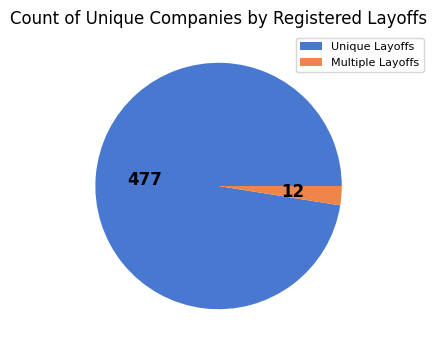

In [228]:
# Creating a pie chart to better visualize this difference
repeated_layoffs_count = df.drop_duplicates(['company'])[['repeated_layoffs']].value_counts()
repeated_layoffs_labels = df['repeated_layoffs'].unique()
repeated_layoffs_total = df['repeated_layoffs'].count()
repeated_layoffs_colors = sns.color_palette('muted')
repeated_layoffs_fig = plt.figure(figsize=(6, 4))

plt.pie(repeated_layoffs_count, colors=repeated_layoffs_colors, autopct=lambda x: '{:.0f}'.format(x * repeated_layoffs_total/100), textprops={'fontsize': 12, 'weight':'bold'})
plt.title('Count of Unique Companies by Registered Layoffs')
plt.legend(labels=repeated_layoffs_labels, fontsize=8, loc=(0.75, 0.87))
plt.show()

## 4.2 Exploring columns: ***total_layoffs***

In [11]:
# Minimum and maximum "total_layoffs"
min_layoff = df['total_layoffs'].min()
max_layoff = df['total_layoffs'].max()

print('The minimum employees affected by layoff in this dataset is {} and the maximum is {}.'.format(min_layoff, max_layoff))

The minimum employees affected by layoff in this dataset is 10 and the maximum is Unclear.


In [12]:
# Checking which values are present in "total_layoffs" beside numbers
text_total_layoff = df[~df['total_layoffs'].str.isnumeric()]['total_layoffs'].unique()
text_total_layoff

array(['Unclear'], dtype=object)

In [13]:
# Saving the text output into the variable
text_total_layoff = text_total_layoff[0]

In [14]:
# Changing "total_columns" type to float
df['total_layoffs'] = pd.to_numeric(df['total_layoffs'], errors='coerce')

# Checking its minimum and maximum (considering only numbers)
min_layoff = df['total_layoffs'].min()
max_layoff = df['total_layoffs'].max()

print('The minimum employees affected by layoff in this dataset is {} and the maximum is {}.'.format(min_layoff, max_layoff))
print('Some rows have "{}" classification'.format(text_total_layoff))

The minimum employees affected by layoff in this dataset is 5.0 and the maximum is 18000.0.
Some rows have "Unclear" classification


In [22]:
# Creating categories for the employees affected
conditions_category_total_layoffs = [
    df['total_layoffs'] < 250,          # <250 employees
    df['total_layoffs'] < 500,          # >=250 & <500
    df['total_layoffs'] < 1000,         # >=500 & <1000
    df['total_layoffs'] < 5000,         # >=1000 & <5000
    df['total_layoffs'] < 10000,        # >=5000 & <10000
    df['total_layoffs'] >= 10000        # >=10000
]

options_category_total_layoffs = [
    '<250',
    '>=250 and <500',
    '>=500 and <1000',
    '>=1000 and <5000',
    '>=5000 and <10000',
    '>=10000'
]

df['category_total_layoffs'] = np.select(conditions_category_total_layoffs, options_category_total_layoffs, 'Undefined')

# Counting each of this category
print('')
print(df['category_total_layoffs'].value_counts().sort_values('total_layoffs'))


<250                 241
Undefined            182
>=250 and <500        26
>=500 and <1000       18
>=1000 and <5000      16
>=10000                4
>=5000 and <10000      2
Name: category_total_layoffs, dtype: int64


<AxesSubplot: >

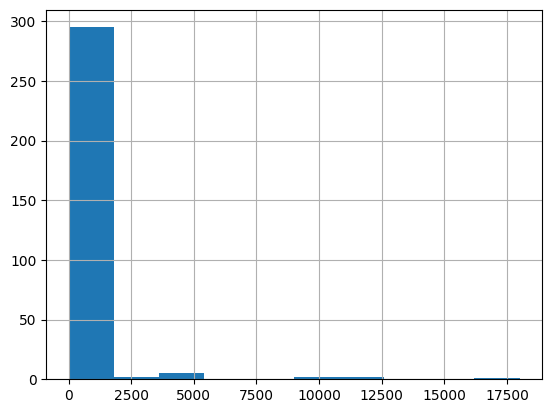

In [30]:
df['total_layoffs'].hist()


In [23]:
df[df['category_total_layoffs'] == 'Undefined']

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes,category_total_layoffs
1,VideoAmp,NaN,2.0,2022-09-19,Advertising platforms,Los Angeles,Company memo,Private,NaN,Undefined
5,NextRoll,NaN,3.0,2022-07-08,Marketing Tech,San Francisco,Business Insider,Private,NaN,Undefined
18,Outreach,NaN,5.0,2022-08-02,Sales Tech,Seattle,LinkedIn,Private,NaN,Undefined
19,Boosted Commerce,NaN,5.0,2022-07-25,E-commerce,Los Angeles,Business Insider,Private,NaN,Undefined
20,Forward,NaN,5.0,2022-07-11,Health Care,San Francisco,Fierce Healthcare,Private,NaN,Undefined
...,...,...,...,...,...,...,...,...,...,...
464,Starry,NaN,74.0,2023-01-18,"WiFi, hardware",Boston,SEC filings,Public,NaN,Undefined
485,Oracle,NaN,NaN,2022-08-01,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...,Undefined
486,LivePerson,NaN,NaN,2022-09-15,Customer service,New York,LinkedIn,Public,NaN,Undefined
487,Skillz,NaN,NaN,2022-08-29,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN,Undefined


## 4.3 Exploring columns: ***impacted_workforce_percentage***

In [15]:
# Minimum and maximum "impacted_workforce_percentage"
min_workforce_percentage = df['impacted_workforce_percentage'].min()
max_workforce_percentage = df['impacted_workforce_percentage'].max()

print('The minimum workforce percentage affected by layoff in this dataset is {} and the maximum is {}.'.format(min_workforce_percentage, max_workforce_percentage))

The minimum workforce percentage affected by layoff in this dataset is 1 and the maximum is Unclear.


In [16]:
# Applying the same logic from "total_layoffs"
text_workforce_percentage = df[~df['impacted_workforce_percentage'].str.isnumeric()]['impacted_workforce_percentage'].unique()
text_workforce_percentage

array(['Unclear'], dtype=object)

In [17]:
# Saving the text
text_workforce_percentage = text_workforce_percentage[0]

# Changing the "impacted_workforce_percentage" type to date
df['impacted_workforce_percentage'] = pd.to_numeric(df['impacted_workforce_percentage'], errors='coerce')

# Checking its minimum and maximum values
min_workforce_percentage = df['impacted_workforce_percentage'].min()
max_workforce_percentage = df['impacted_workforce_percentage'].max()

print('The minimum impacted workforce percentage in this dataset is {} and the maximum is {}.'.format(min_workforce_percentage, max_workforce_percentage))
print('Some rows have "{}" classification'.format(text_workforce_percentage))

The minimum impacted workforce percentage in this dataset is 1.0 and the maximum is 100.0.
Some rows have "Unclear" classification


## 4.4 Exploring columns: ***reported_date***

In [18]:
# Converting the "reported_date" column type to date
df['reported_date'] = pd.to_datetime(df['reported_date'], errors='coerce')

# Saving minimum and maximum values
min_reported_date = df['reported_date'].min()
max_reported_date = df['reported_date'].max()

print('The first reported date in this dataset is {} and the last one is {}'.format(min_reported_date, max_reported_date))

The first reported date in this dataset is 2022-01-27 00:00:00 and the last one is 2023-01-24 00:00:00


In [19]:
# CHECK LAYOFF FOR EACH MONTH

## 4.5 Exploring columns: ***industry***

In [20]:
# Counting how many uniques industries are listed in the dataset
total_industries = df['industry'].nunique()

print('There is a total of {} different industries in this dataset.'.format(total_industries))

There is a total of 289 different industries in this dataset.


In [21]:
# Showing the 10 most repetitive industries
df['industry'].value_counts().head(10)

Fintech           24
Health Care       17
PropTech          15
E-commerce        13
Cybersecurity     10
Proptech           9
FinTech            7
InsurTech          7
Cryptocurrency     7
Fitness            6
Name: industry, dtype: int64

----

### 💡 **Analysis 1) Check which companies had more and fewer layoff**

In [ ]:
# Converting columns to their correct type
tech_layoffs['total_layoffs'] = pd.to_numeric(tech_layoffs['total_layoffs'], errors='coerce')
tech_layoffs['impacted_workforce_percentage'] = pd.to_numeric(tech_layoffs['impacted_workforce_percentage'], errors='coerce')
tech_layoffs['reported_date'] = pd.to_datetime(tech_layoffs['reported_date'], format='%d/%M/%Y')

In [ ]:
tech_layoffs.sample(1)

In [ ]:
# Step 1: calculating the total employees for each company (that has "total_layoff" and "impacted_workforce_percentage" filled)
tech_layoffs['total_employees'] = ((tech_layoffs['total_layoffs'] / 100) / (tech_layoffs['impacted_workforce_percentage'] / 100)) * 100

# Step 2: rounding the "total_employees" value
tech_layoffs['total_employees'] = tech_layoffs['total_employees'].round(0)

tech_layoffs.sample(2)

In [ ]:
# Step 3: grouping by company name and removing rows with empty "total_layoffs" or "total_employees"
top_companies = tech_layoffs.groupby('company', as_index=False)[['total_layoffs', 'total_employees']].sum()

top_companies = top_companies[top_companies['total_layoffs'] > 0]
top_companies = top_companies[top_companies['total_employees'] > 0]

# Step 4: creating total layoff percentage (in case a company had layoff twice or more)
top_companies['total_layoff_percentage'] = ((top_companies['total_layoffs'] / top_companies['total_employees']) * 100).round(1)

top_companies.sample(3)

In [ ]:
# Step 5.1: categorizing the company size
company_size_conditions = [
    top_companies['total_employees'] < 100,      # <100 Employees => Small Company
    top_companies['total_employees'] < 500,      # >=100 & <500 Employees => Mid Company
    top_companies['total_employees'] < 2000,     # >=500 & <2000 Employees => Large Company
    top_companies['total_employees'] >= 2000     # >=2000 Employees => Big Tech
]

company_size_options = [
    'Small Company',
    'Mid Company',
    'Large Company',
    'Big Tech'
]

top_companies['company_size'] = np.select(company_size_conditions, company_size_options, 'Unidentified')

top_companies.sample(3)

In [ ]:
# Step 5.2: merging the "company_size" column to the main dataframe
tech_layoffs = pd.merge(top_companies[['company', 'company_size']], tech_layoffs, how='left', on='company')

tech_layoffs.sample(3)

----

In [ ]:
# Step 6.1: sorting by top 10 most "total_layoffs"
top_companies.sort_values('total_layoffs', ascending=False).head(5).reset_index(drop=True)

In [ ]:
# Analyzing 6.1: top 10 most "total_layoffs"
tech_layoffs[tech_layoffs['company'] == 'Amazon']

----

In [ ]:
# Step 6.2: sorting by top 10 fewer "total_layoffs"
top_companies.sort_values('total_layoffs', ascending=True).head(5).reset_index(drop=True)

In [ ]:
# Step 6.3: sorting by top 10 most "total_layoff_percentage" (important!)
top_companies.sort_values('total_layoff_percentage', ascending=False).head(10).reset_index(drop=True)

In [ ]:
# Step 6.4: sorting by top 10 fewer "total_layoff_percentage" (important!)
top_companies.sort_values('total_layoff_percentage', ascending=True).head(10).reset_index(drop=True)

----

contar quantas vezes a empresa fez layoff
isso é negativo pra ela se fez mais de 1 vez

## Analysis 2) Rank which industry had most layoff 

## Analysis 3)  

In [ ]:
# Exporting files to .csv to read in Power BI
tech_layoffs.to_csv('../data/tech_layoffs.csv')
top_companies.to_csv('../data/top_companies.csv')